Fetching IMDB dataset:
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Encoding sequences:

Training with 1 hidden layers...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.7154 - auc: 0.7884 - loss: 0.5681 - precision: 0.7335 - recall: 0.6550 - val_accuracy: 0.8716 - val_auc: 0.9422 - val_loss: 0.3761 - val_precision: 0.8420 - val_recall: 0.9183
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9063 - auc: 0.9640 - loss: 0.3163 - precision: 0.8995 - recall: 0.9126 - val_accuracy: 0.8875 - val_auc: 0.9523 - val_loss: 0.3104 - val_precision: 0.8735 - val_recall: 0.9090
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9274 - auc: 0.9770 - loss: 0.2440 - precision: 0.9208 - recall: 0.9337 - val_accuracy: 0.8869 - val_auc: 0.9545 - val_loss: 0.2914 - val_precision: 0.8582 - val_recall: 0.9297
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9386 - auc: 0.9832 - loss: 0.2036 - precision: 0.9333 - recall: 0.9434 - val_accuracy: 0.8906 - val_auc: 0.9551 - val_loss: 0.2780 - val_precision: 0.8764 - val_recall: 0.9121
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━

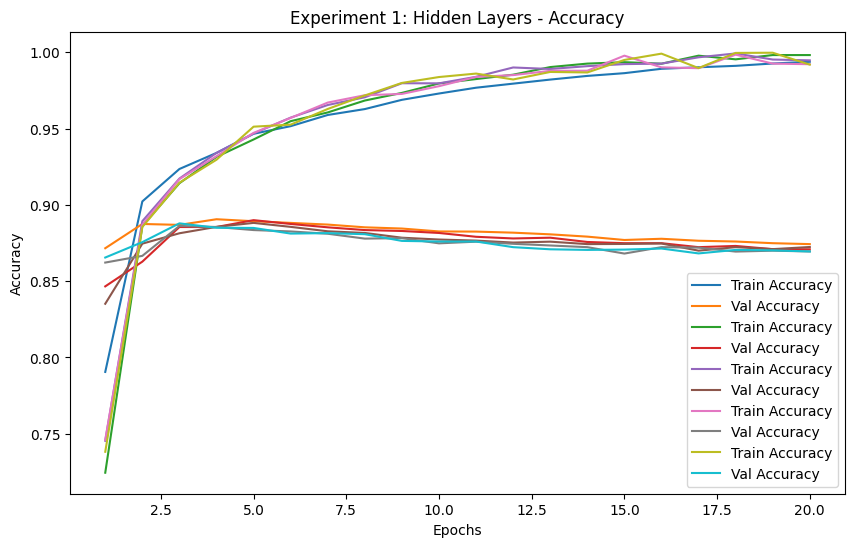

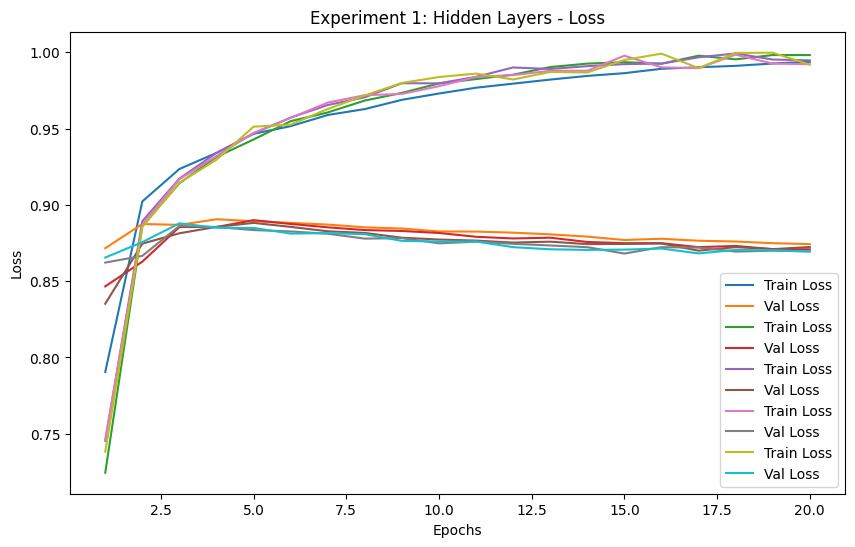

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
import tensorflow as tf
import random

# Adjusting the randomization for reliable outcomes
def fix_seed(seed_value=123):
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)
    random.seed(seed_value)

fix_seed(123)

# Retrieving the IMDB review dataset
print("Fetching IMDB dataset:")
((train_data, train_labels), (test_data, test_labels)) = imdb.load_data(num_words=10000)

# Convert sequences into a binary matrix in the bag-of-words approach
def one_hot_encode(sequences, vocab_size=10000):
    matrix = np.zeros((len(sequences), vocab_size))
    for idx, seq in enumerate(sequences):
        matrix[idx, seq] = 1.0
    return matrix

# Preparing the vectorized input data
print("Encoding sequences:")
X_train = one_hot_encode(train_data)
X_test = one_hot_encode(test_data)

Y_train = np.asarray(train_labels).astype("float32")
Y_test = np.asarray(test_labels).astype("float32")

# Create a validation holdout set
X_val = X_train[:10000]
X_train = X_train[10000:]

Y_val = Y_train[:10000]
Y_train = Y_train[10000:]

# Function to generate model architectures
def create_network(hidden_layers=2, neurons=16, act_func='relu', drop_rate=0.0, loss_fn='binary_crossentropy'):
    net = keras.Sequential()
    net.add(layers.Dense(neurons, activation=act_func, input_shape=(10000,)))

    for _ in range(hidden_layers - 1):
        net.add(layers.Dense(neurons, activation=act_func))
        if drop_rate > 0.0:
            net.add(layers.Dropout(drop_rate))

    net.add(layers.Dense(1, activation='sigmoid'))

    net.compile(optimizer='rmsprop',
                loss=loss_fn,
                metrics=['accuracy', 'precision', 'recall', 'auc'])
    return net

# Storing the experimental outcomes
experiment_results = {
    'LayerCount': {},
    'NeuronCount': {},
    'LossType': {},
    'ActivationFunc': {},
    'DropoutRate': {}
}

# Function to show training vs validation metrics
def draw_curves(histories, graph_title, y_label):
    plt.figure(figsize=(10, 6))
    for label, hist in histories.items():
        epoch_range = range(1, len(hist.history['accuracy']) + 1)
        plt.plot(epoch_range, hist.history['accuracy'], label=f'Train {y_label}')
        plt.plot(epoch_range, hist.history['val_accuracy'], label=f'Val {y_label}')
    plt.title(graph_title)
    plt.xlabel('Epochs')
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

# Experiment-1: Varying the depth of the layers
layer_variations = [1, 2, 3, 4, 5]
layer_histories = {}
for count in layer_variations:
    print(f"\nTraining with {count} hidden layers...")
    net = create_network(hidden_layers=count, neurons=16)
    hist = net.fit(X_train, Y_train, epochs=20, batch_size=512, validation_data=(X_val, Y_val), verbose=1)
    layer_histories[count] = hist
    val_score = hist.history['val_accuracy'][-1]
    test_score = net.evaluate(X_test, Y_test, verbose=0)[1]
    experiment_results['LayerCount'][count] = {'Val Acc': val_score, 'Test Acc': test_score}

draw_curves(layer_histories, 'Experiment 1: Hidden Layers - Accuracy', 'Accuracy')
draw_curves(layer_histories, 'Experiment 1: Hidden Layers - Loss', 'Loss')



Training model with 32 units:
Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.6989 - auc: 0.7696 - loss: 0.5864 - precision: 0.6998 - recall: 0.6971 - val_accuracy: 0.8713 - val_auc: 0.9412 - val_loss: 0.3641 - val_precision: 0.8665 - val_recall: 0.8811
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.8963 - auc: 0.9565 - loss: 0.3133 - precision: 0.8913 - recall: 0.9003 - val_accuracy: 0.8752 - val_auc: 0.9515 - val_loss: 0.3133 - val_precision: 0.8300 - val_recall: 0.9470
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.9256 - auc: 0.9755 - loss: 0.2265 - precision: 0.9170 - recall: 0.9343 - val_accuracy: 0.8903 - val_auc: 0.9545 - val_loss: 0.2768 - val_precision: 0.8776 - val_recall: 0.9098
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9341 - auc: 0.9825 - loss: 0.1850 - precision: 0.9290 - recall: 0.9386 - val_accuracy: 0.8871 - val_auc: 0.9542 - val_loss: 0.2791 - val_precision: 0.8659 - val_recall: 0.9189
Epoch

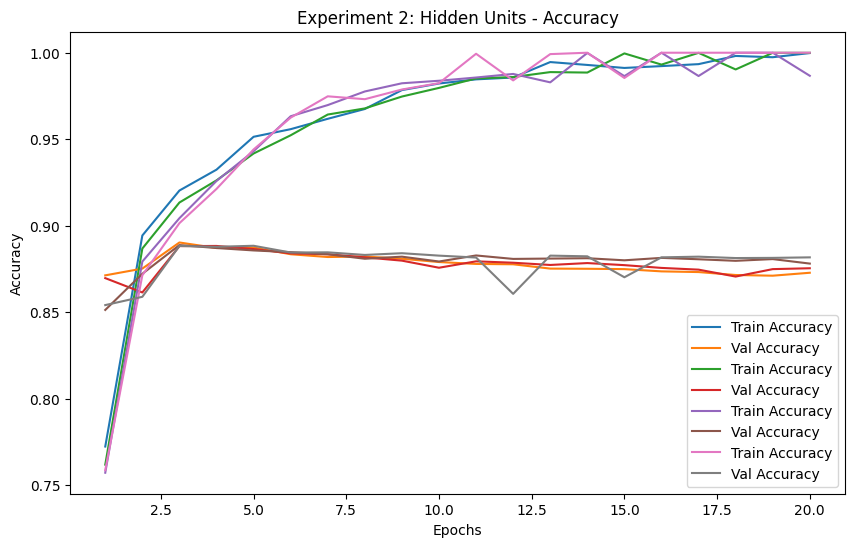

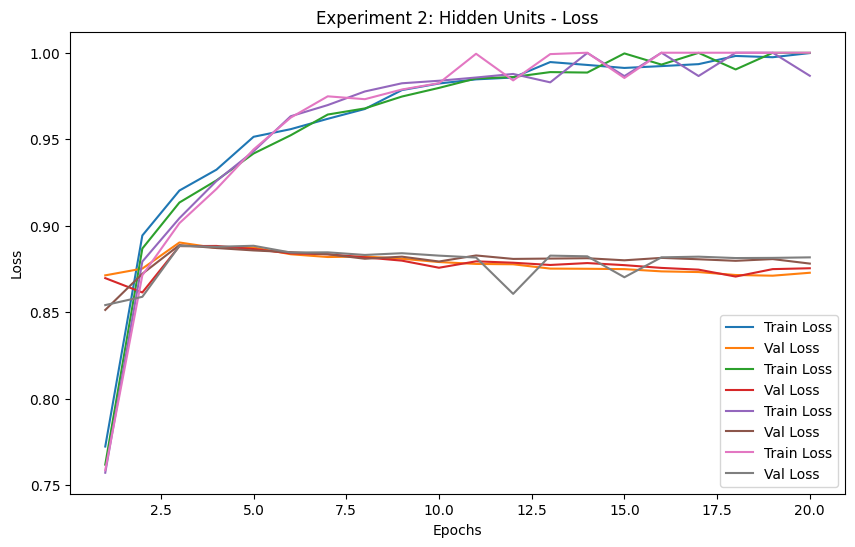

In [2]:
# Experiment 2: differentiating the no. of units per layer
neuron_options = [32, 64, 128, 256]
neuron_histories = {}
for n_units in neuron_options:
    print(f"\nTraining model with {n_units} units:")
    net = create_network(hidden_layers=2, neurons=n_units)
    hist = net.fit(X_train, Y_train, epochs=20, batch_size=512, validation_data=(X_val, Y_val), verbose=1)
    neuron_histories[n_units] = hist
    val_acc = hist.history['val_accuracy'][-1]
    test_acc = net.evaluate(X_test, Y_test, verbose=0)[1]
    experiment_results['NeuronCount'][n_units] = {'Val Acc': val_acc, 'Test Acc': test_acc}

draw_curves(neuron_histories, 'Experiment 2: Hidden Units - Accuracy', 'Accuracy')
draw_curves(neuron_histories, 'Experiment 2: Hidden Units - Loss', 'Loss')



Training model with MSE loss:
Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.7009 - auc: 0.7743 - loss: 0.2099 - precision: 0.6809 - recall: 0.7454 - val_accuracy: 0.8534 - val_auc: 0.9353 - val_loss: 0.1316 - val_precision: 0.8153 - val_recall: 0.9179
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8827 - auc: 0.9503 - loss: 0.1124 - precision: 0.8703 - recall: 0.8968 - val_accuracy: 0.8774 - val_auc: 0.9489 - val_loss: 0.1026 - val_precision: 0.8523 - val_recall: 0.9161
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9113 - auc: 0.9682 - loss: 0.0826 - precision: 0.9035 - recall: 0.9190 - val_accuracy: 0.8847 - val_auc: 0.9523 - val_loss: 0.0920 - val_precision: 0.8603 - val_recall: 0.9214
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9321 - auc: 0.9775 - loss: 0.0653 - precision: 0.9263 - recall: 0.9374 - val_accuracy: 0.8830 - val_auc: 0.9531 - val_loss: 0.0895 - val_precision: 0.8500 - val_recall: 0.9331
Epoc

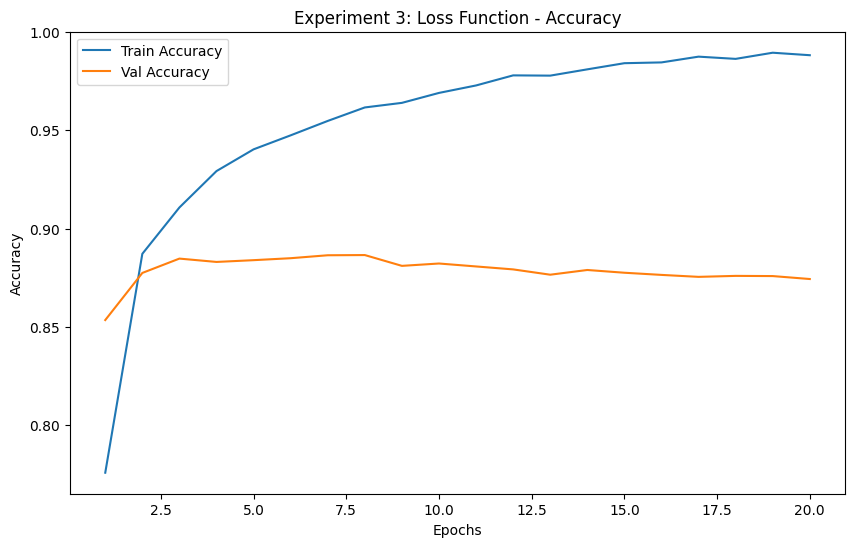

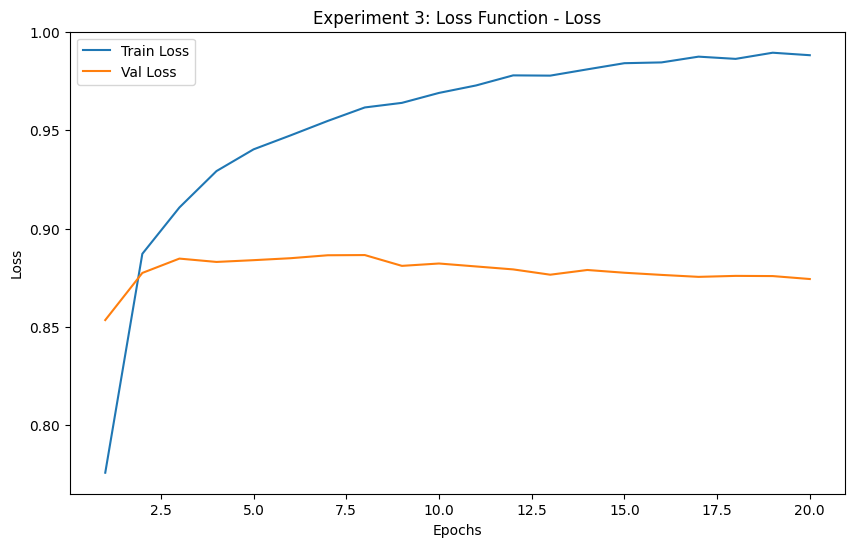

In [3]:
# Experiment 3: Varying the loss function
loss_histories = {}
print("\nTraining model with MSE loss:")
net_mse = create_network(hidden_layers=2, neurons=16, loss_fn='mse')
hist_mse = net_mse.fit(X_train, Y_train, epochs=20, batch_size=512, validation_data=(X_val, Y_val), verbose=1)
loss_histories['MSE'] = hist_mse
val_acc_mse = hist_mse.history['val_accuracy'][-1]
test_acc_mse = net_mse.evaluate(X_test, Y_test, verbose=0)[1]
experiment_results['LossType']['MSE'] = {'Val Acc': val_acc_mse, 'Test Acc': test_acc_mse}

draw_curves(loss_histories, 'Experiment 3: Loss Function - Accuracy', 'Accuracy')
draw_curves(loss_histories, 'Experiment 3: Loss Function - Loss', 'Loss')



Training model with tanh activation:
Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.7097 - auc: 0.7816 - loss: 0.5696 - precision: 0.7148 - recall: 0.6855 - val_accuracy: 0.8524 - val_auc: 0.9415 - val_loss: 0.3785 - val_precision: 0.7980 - val_recall: 0.9478
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9011 - auc: 0.9629 - loss: 0.2998 - precision: 0.8891 - recall: 0.9143 - val_accuracy: 0.8875 - val_auc: 0.9533 - val_loss: 0.2889 - val_precision: 0.8715 - val_recall: 0.9117
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9311 - auc: 0.9792 - loss: 0.2080 - precision: 0.9252 - recall: 0.9365 - val_accuracy: 0.8852 - val_auc: 0.9546 - val_loss: 0.2801 - val_precision: 0.8556 - val_recall: 0.9297
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9435 - auc: 0.9854 - loss: 0.1635 - precision: 0.9401 - recall: 0.9461 - val_accuracy: 0.8864 - val_auc: 0.9540 - val_loss: 0.2776 - val_precision: 0.8787 - val_recall: 0.899

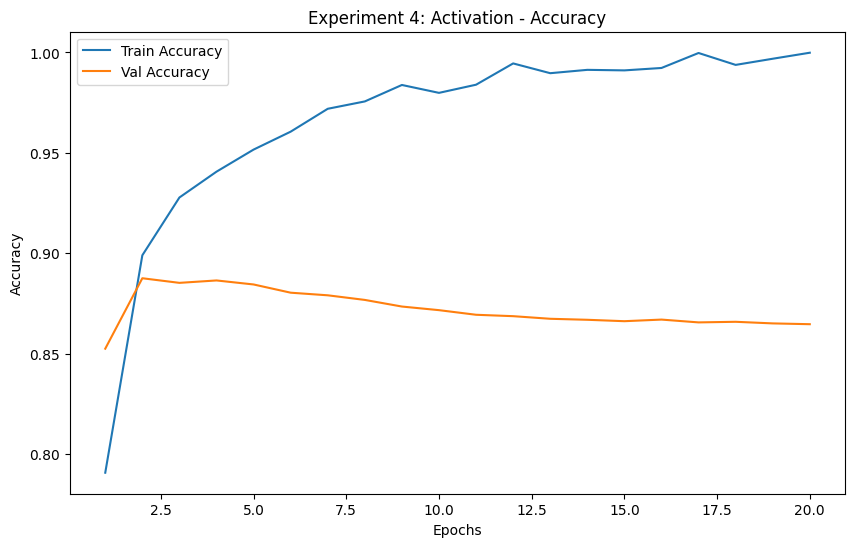

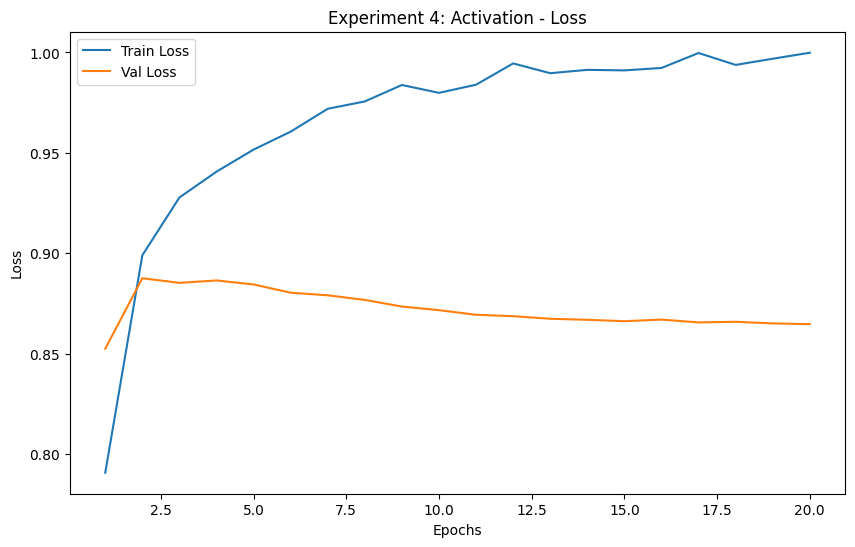

In [4]:
# Experiment no.4: Varying the activation function
activation_histories = {}
print("\nTraining model with tanh activation:")
net_tanh = create_network(hidden_layers=2, neurons=16, act_func='tanh')
hist_tanh = net_tanh.fit(X_train, Y_train, epochs=20, batch_size=512, validation_data=(X_val, Y_val), verbose=1)
activation_histories['tanh'] = hist_tanh
val_acc_tanh = hist_tanh.history['val_accuracy'][-1]
test_acc_tanh = net_tanh.evaluate(X_test, Y_test, verbose=0)[1]
experiment_results['ActivationFunc']['tanh'] = {'Val Acc': val_acc_tanh, 'Test Acc': test_acc_tanh}

draw_curves(activation_histories, 'Experiment 4: Activation - Accuracy', 'Accuracy')
draw_curves(activation_histories, 'Experiment 4: Activation - Loss', 'Loss')



Training model with 0.3 dropout:
Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.6659 - auc: 0.7299 - loss: 0.6187 - precision: 0.6614 - recall: 0.6758 - val_accuracy: 0.8639 - val_auc: 0.9372 - val_loss: 0.4139 - val_precision: 0.8664 - val_recall: 0.8638
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8631 - auc: 0.9314 - loss: 0.3888 - precision: 0.8556 - recall: 0.8703 - val_accuracy: 0.8841 - val_auc: 0.9500 - val_loss: 0.3225 - val_precision: 0.8694 - val_recall: 0.9068
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.8992 - auc: 0.9608 - loss: 0.2892 - precision: 0.8935 - recall: 0.9041 - val_accuracy: 0.8838 - val_auc: 0.9528 - val_loss: 0.2923 - val_precision: 0.8551 - val_recall: 0.9272
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9238 - auc: 0.9731 - loss: 0.2326 - precision: 0.9165 - recall: 0.9308 - val_accuracy: 0.8897 - val_auc: 0.9548 - val_loss: 0.2746 - val_precision: 0.8745 - val_recall: 0.9127
Ep

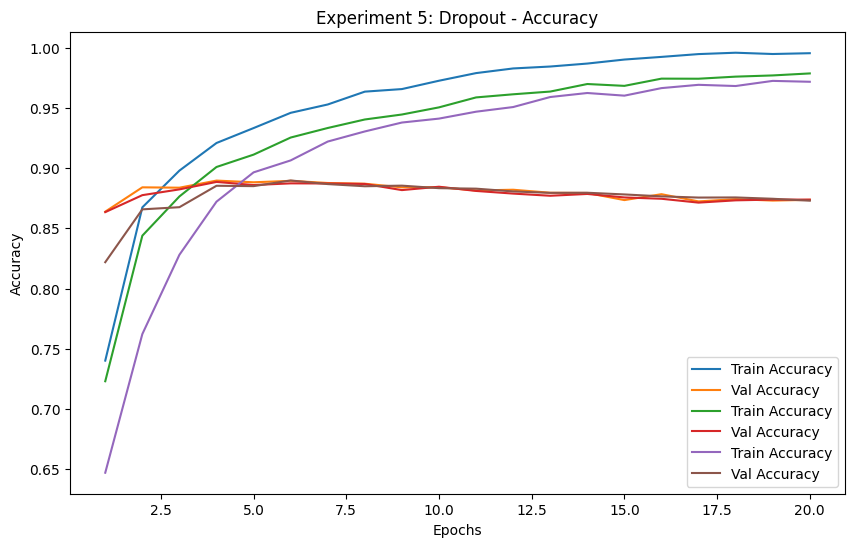

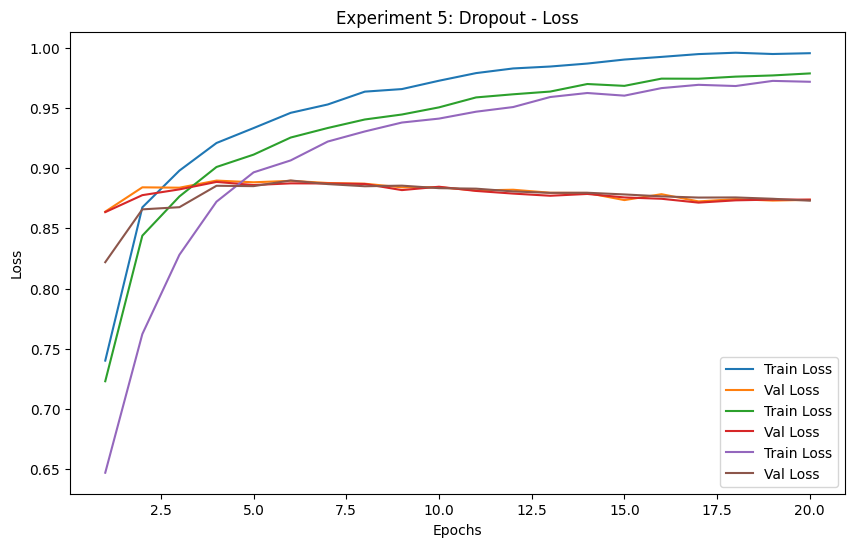

In [5]:
# Experiment 5: Effect of the Dropout Function
dropout_histories = {}
dropout_rates = [0.3, 0.5, 0.7]
for rate in dropout_rates:
    print(f"\nTraining model with {rate} dropout:")
    net = create_network(hidden_layers=2, neurons=16, drop_rate=rate)
    hist = net.fit(X_train, Y_train, epochs=20, batch_size=512, validation_data=(X_val, Y_val), verbose=1)
    dropout_histories[rate] = hist
    val_acc_dropout = hist.history['val_accuracy'][-1]
    test_acc_dropout = net.evaluate(X_test, Y_test, verbose=0)[1]
    experiment_results['DropoutRate'][rate] = {'Val Acc': val_acc_dropout, 'Test Acc': test_acc_dropout}

draw_curves(dropout_histories, 'Experiment 5: Dropout - Accuracy', 'Accuracy')
draw_curves(dropout_histories, 'Experiment 5: Dropout - Loss', 'Loss')

In [6]:
# Displaying the summary of the experiment's outcome
print("\nFinal Results: ")
for exp_name, outcome_dict in experiment_results.items():
    print(f"\n{exp_name}:")
    df_outcome = pd.DataFrame(outcome_dict).T
    df_outcome.columns = ["Val Acc", "Test Acc"]
    print(df_outcome)



Final Results: 

LayerCount:
   Val Acc  Test Acc
1   0.8743   0.86220
2   0.8709   0.85784
3   0.8724   0.85900
4   0.8695   0.85624
5   0.8695   0.85628

NeuronCount:
     Val Acc  Test Acc
32    0.8728   0.86024
64    0.8754   0.86280
128   0.8781   0.86692
256   0.8817   0.87096

LossType:
     Val Acc  Test Acc
MSE   0.8743    0.8626

ActivationFunc:
      Val Acc  Test Acc
tanh   0.8646   0.85196

DropoutRate:
     Val Acc  Test Acc
0.3   0.8737   0.86192
0.5   0.8739   0.86156
0.7   0.8730   0.86376
